The data was provided in an Excel file. Part of the feature engineering has already been carried out. Therefore, not the entire feature engineering process can be traced using this code. 

In [15]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# check the computer name and set the path accordingly
if os.environ['COMPUTERNAME'] == 'FYNN':            # name of surface PC
    sys.path.append(r'C:\Users\Surface\Masterarbeit')
elif os.environ['COMPUTERNAME'] == 'FYNNS-PC':  # desktop name
    sys.path.append(r'C:\Users\test\Masterarbeit')
    
else:
    raise ValueError("Unbekannter Computername: " + os.environ['COMPUTERNAME'])

# path = r"C:\Users\Surface\Masterarbeit\data\Produktionsdaten\WZ_2_Feature_Engineered_1.xlsx"
# #path = r"C:\Users\Surface\Masterarbeit\data\Produktionsdaten\WZ_2_Feature_Engineered_vorsortiert.xlsx"

from config import RAW_DATA_PATH, SAVE_PATH

prod_data_df = pd.read_excel(RAW_DATA_PATH)

ImportError: cannot import name 'RAW_DATA_PATH' from 'config' (C:\Users\Surface\Masterarbeit\config.py)

Explore the data

In [11]:
#get some insights into the data
display(prod_data_df.describe())
display(prod_data_df.info())

print(prod_data_df.columns)
# Check for categorial variables, i.e. variables with a low number of unique values
number_unique = prod_data_df.nunique(axis = 0).sort_values(ascending=False)
display(number_unique)

,C1_V01_delta_kan,BT_NR,STP_NR,Ist_Blechhaltergewicht,Ist_Gegenhaltekraft_HL_1,Ist_Gewichtsausgleich,Ist_Hubzahl,Ist_Stoesselverstellung-mm,Ist_Ziehkissenverstellung,Ist_Ziehtiefe,...,Diff_Gegenhalterkraft_HL_1,Diff_Gegenhalterkraft_HR_1,Diff_Gegenhalterkraft_VL_1,Diff_Gegenhalterkraft_VR_1,Diff_Blechhaltergewicht,Diff_Hubzahl,Diff_Ziehtiefe,Diff_Ziehkissenverstellung,Diff_Stoesselverstellung-mm,Diff_Gewichtsausgleich
count,52013.000000,52013.000000,52013.000000,52013.000000,52013.000000,52013.000000,52013.000000,52013.000000,52013.00000,52013.000000,...,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52013.000000,52013.000000,52013.000000,52013.000000,52013.000000
mean,115.016421,158.085229,5.113702,0.007114,714.660719,5.746498,15.220185,1174.993290,149.99106,99.685561,...,14.660706,13.860991,21.548999,23.323643,-4.992886,-0.840002,0.141422,-0.003172,0.038471,0.447315
std,7.621156,94.645919,3.175297,0.188462,2.803588,0.066396,0.812121,0.069343,0.04080,5.485603,...,2.803613,2.538687,2.760246,2.821857,0.188466,1.019945,2.005954,0.931085,7.287052,0.068352
min,59.203040,1.000000,0.000000,0.000000,700.000000,4.800000,8.000000,1174.900000,149.90000,83.400000,...,0.000000,0.000000,0.000000,0.000000,-5.000000,-9.000000,-18.200000,-0.100000,-0.100000,0.000000
25%,110.602900,77.000000,2.000000,0.000000,713.000000,5.700000,14.400000,1174.900000,150.00000,101.300000,...,13.000000,13.000000,20.000000,21.000000,-5.000000,-2.100000,0.000000,0.000000,-0.100000,0.400000
50%,114.982600,152.000000,5.000000,0.000000,713.000000,5.700000,14.900000,1175.000000,150.00000,101.600000,...,13.000000,13.000000,20.000000,25.000000,-5.000000,-0.200000,0.000000,0.000000,0.000000,0.400000
75%,120.784900,237.000000,8.000000,0.000000,717.000000,5.800000,15.800000,1175.000000,150.00000,102.100000,...,17.000000,17.000000,24.000000,25.000000,-5.000000,-0.100000,0.300000,0.000000,0.000000,0.500000
max,140.684000,349.000000,14.000000,5.000000,725.000000,6.000000,17.100000,1175.100000,150.10000,102.800000,...,25.000000,25.000000,32.000000,36.000000,0.000000,3.400000,3.000000,150.000000,1175.100000,0.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52013 entries, 0 to 52012
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   C1_V01_delta_kan                  52013 non-null  float64
 1   BT_NR                             52013 non-null  int64  
 2   STP_NR                            52013 non-null  int64  
 3   Ist_Blechhaltergewicht            52013 non-null  int64  
 4   Ist_Gegenhaltekraft_HL_1          52013 non-null  int64  
 5   Ist_Gewichtsausgleich             52013 non-null  float64
 6   Ist_Hubzahl                       52013 non-null  float64
 7   Ist_Stoesselverstellung-mm        52013 non-null  float64
 8   Ist_Ziehkissenverstellung         52013 non-null  float64
 9   Ist_Ziehtiefe                     52013 non-null  float64
 10  senden_Lebensbit                  52013 non-null  int64  
 11  sollwerte_Gewichtsausgleich       52013 non-null  float64
 12  soll

None

Index(['C1_V01_delta_kan', 'BT_NR', 'STP_NR', 'Ist_Blechhaltergewicht',
       'Ist_Gegenhaltekraft_HL_1', 'Ist_Gewichtsausgleich', 'Ist_Hubzahl',
       'Ist_Stoesselverstellung-mm', 'Ist_Ziehkissenverstellung',
       'Ist_Ziehtiefe', 'senden_Lebensbit', 'sollwerte_Gewichtsausgleich',
       'sollwerte_Hubzahl', 'sollwerte_Ziehtiefe', 'T1', 'T2', 'T3', 'K1',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14',
       'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'K7', 'T22', 'T23',
       'T24', 'K8', 'DS_10', 'GS_10', 'SD_10', 'LS_10', 'PP_10', 'TT_10',
       'TM5_10', 'RF_10', 'TD_10', 'is_weekend', 'dayofweek_sin',
       'dayofweek_cos', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos',
       'minute_sin', 'minute_cos', 'second_sin', 'second_cos', 'day_sin',
       'day_cos', 'quarter_sin', 'quarter_cos', 'week_sin', 'week_cos',
       'sollwerte_Blechhaltergewicht', 'sollwerte_Gegenhaltekraft_HL_1',
       'sollwerte_Stoesselverstellung-mm', 'sollwe

RF_10                               494
BT_NR                               349
TM5_10                              318
TT_10                               290
GS_10                               279
                                   ... 
is_weekend                            2
sollwerte_Stoesselverstellung-mm      1
sollwerte_Gegenhaltekraft_HL_1        1
sollwerte_Blechhaltergewicht          1
sollwerte_Ziehkissenverstellung       1
Length: 81, dtype: int64

Distribution of the target value

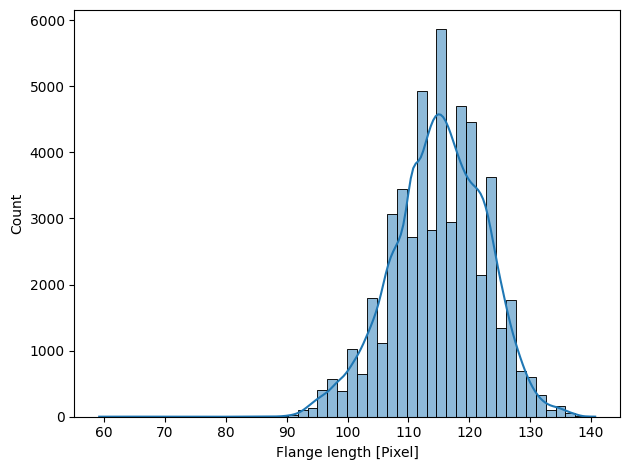

Mean: 115.01642119239422
std deviation: 7.621156305964063


In [ ]:
# plot the target data distribution
sns.histplot(prod_data_df[TARGET], bins=50, kde=True)
plt.xlabel('Flange length [Pixel]')  # Ändere hier die X-Achsen-Beschriftung
plt.tight_layout()
plt.savefig(os.path.join(SAVE_PATH, "Target distribution.svg"), format ='svg')
plt.show()
print(f'Mean: {prod_data_df[TARGET].mean()}')
print(f'std deviation: {prod_data_df[TARGET].std()}')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, SelectKBest
import numpy as np

# Define the target variable
target = 'C1_V01_delta_kan'

X = prod_data_df.drop(columns=[TARGET]) #.to_numpy()
y = prod_data_df[TARGET] #.to_numpy()

f_statistic, p_value = f_regression(X, y)

print(f"F-statistic: {f_statistic}")
print(f"P-values: {p_value}")

X_new = SelectKBest(f_regression, k=15).fit_transform(X, y)
# get the feature names of the selected features
print(X_new.shape)
selected_features = X.columns[SelectKBest(f_regression, k=15).fit(X, y).get_support()]
print("Selected features:", selected_features)

Korrelationsmatrix

In [ ]:



df1 = df

# Convert categorical variables to frequency encoding
# Define categorical variables
cat_vars = ['BT_NR', 'STP_NR']
# loop through each categorical variable
# for var in cat_vars:
#     # frequency of each category
#     freq = df1[var].value_counts()
#     # map the freqency to the orginal dataframe
#     df1[var + '_freq'] = df1[var].map(freq)
#     # drop the original categorical variable
#     df1.drop(var, axis=1, inplace=True)

# Korrelationmatrix nach Pearson, Annahme Daten haben lineare Korrelation
corr = df1.corr('pearson')

# definiere Target Variable
target = 'C1_V01_delta_kan'
# Korrelationsmatrix für die Target Variable, absteigend sortiert
corr_matrix = corr[target].sort_values(ascending=False)



# plot the correlation matrix for the target variable
plt.figure(figsize=(12, 8))
# corr_matrix.to_frame because corr_matrix is a Series
# annot = True to show the correlation values
# fmt = for the numbers after the comma
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Korrelation mit {target}')
plt.show()

#plot the correlation matrix for all variables
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm',  fmt='.2f')
plt.title('Korrelationsmatrix')
plt.show()


First Filter for Feature Selection
F_Regression for linear Relationship:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

Mutual information for any Relationship:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.
mutual_info_regression

Comparision of both

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html


In [ ]:
# use f_regression and mutual_info_regression to calculate the feature importance
# f_regression is a statistical test that calculates the F-value and p-value for each feature, 
# it captures the linear relationship between the features and the target variable 
# mutual_info_regression captures any kind of relationship, linear or non-linear, between the features and the target variable
# both methods are used to determine the importance of each feature in relation to the target variable
# calculate the F-values and p-values for each feature
# f_regression returns the F-values and p-values for each feature
f_vals, p_vals = f_regression(X_full, y_full)
mi_vals = mutual_info_regression(X_full, y_full, n_jobs = -1)

# create a dataframe with the feature names and the mutual information scores and f-values
feature_scores_MI = pd.DataFrame({
    'Feature': feature_names,
    'Mutual Information': mi_vals,
})
feature_scores_F = pd.DataFrame({
    'Feature': feature_names,
    'F_value': f_vals,
    'P_value': p_vals
})
# sort the feature scores by mutual information and F-value
feature_scores_MI_sorted = feature_scores_MI.sort_values(by='Mutual Information', ascending=False)
feature_scores_F_sorted = feature_scores_F.sort_values(by='F_value', ascending=False)
# merge the two dataframes on the feature names to get a combined view of the feature importance
feature_scores = pd.merge(feature_scores_MI_sorted, feature_scores_F_sorted, on='Feature')

# list to store features with low scores
low_feature_scores =[]

# plot the feature importance using mutual information and F-value in a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(feature_scores['Mutual Information'], feature_scores['F_value'])
plt.xlabel('Mutual Information')
plt.ylabel('F-value')
plt.title('Feature Importance: Mutual Information vs F-value')
plt.grid(True)

# Annotate and save the points with low feature scores in a list
for i, row in feature_scores.iterrows():
    if row['Mutual Information'] < 0.03 and row['F_value'] < 10:
        low_feature_scores.append(row['Feature'])
        plt.annotate(row['Feature'], (row['Mutual Information'], row['F_value']), fontsize=8)
        
plt.show()
